In [244]:
V = 4

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Ejemplo Administración

In [277]:
objetivo = 'Administración'

dataTrain1 = pd.read_excel('Datos_Limpios/datos2019_V'+str(V)+'.xlsx')
dataTrain2 = pd.read_excel('Datos_Limpios/datos2020_V'+str(V)+'.xlsx')
dataTrain1 = dataTrain1.fillna(0)
dataTrain2 = dataTrain2.fillna(0)

dataTrain1 = dataTrain1.loc[dataTrain1['Principal'] == objetivo]
dataTrain2 = dataTrain2.loc[dataTrain2['Principal'] == objetivo]

dataTrain = pd.concat([dataTrain1, dataTrain2])
dataTrain.head()

,Principal,Secundario,AsistentesGraduados,Graduados,TransferenciasExternas,ProfesDoctoradoMaestria,QuieroEstudiar,ProfesSexo,Puestos,Target
0,Administración,Arquitectura,0.001237,-0.016815,-0.004077,-0.029897,0.012527,-0.033333,0.005381,0.003452
1,Administración,Diseño,0.000900,-0.000934,-0.005582,-0.023687,0.010661,0.154472,0.014966,0.022210
2,Administración,Arte,0.005754,-0.001948,-0.006863,0.014241,0.012660,0.122807,0.005549,0.000800
3,Administración,Historia del Arte,0.024837,0.097677,-0.006863,0.019314,-0.012582,0.222222,0.003027,0.002747
4,Administración,Literatura,-0.002941,-0.015024,-0.006863,0.012511,0.044958,0.118280,0.013284,0.001645


In [247]:
predictors = dataTrain.keys()
predictors = predictors.drop(['Target', 'Principal', 'Secundario'])
predictors

Index(['AsistentesGraduados', 'Graduados', 'TransferenciasExternas',
       'ProfesDoctoradoMaestria', 'QuieroEstudiar', 'ProfesSexo', 'Puestos'],
      dtype='object')

In [248]:
X_train = dataTrain[predictors]
Y_train = dataTrain['Target']

In [249]:
GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01)
GB.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01)

In [250]:
dataTest = pd.read_excel('Datos_Limpios/datos2021_V'+str(V)+'.xlsx')
dataTest = dataTest.fillna(0)
dataTest = dataTest.loc[dataTest['Principal'] == objetivo]

In [251]:
X_test = dataTest[predictors]
Y_test = dataTest['Target']

In [252]:
r2_score(Y_test, GB.predict(X_test))

0.7732975376387993

<ipython-input-258-926d6ab8ed49>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-258-926d6ab8ed49>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)
<ipython-input-258-926d6ab8ed49>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and

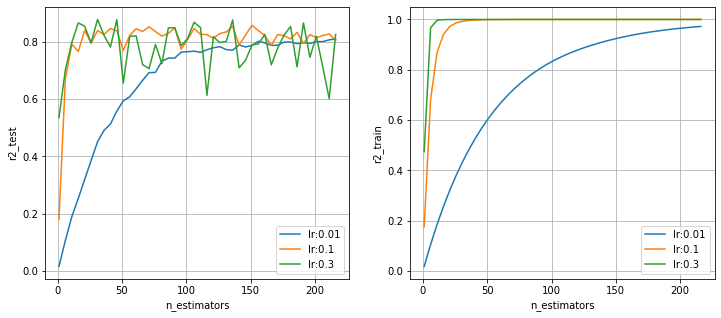

In [258]:
learning_rates = [0.01,0.1,0.3]
n_estimators = np.arange(1,220,5)

fig = plt.figure(figsize=(12,5))

for lr in learning_rates:
    r2_test = []
    r2_train = []

    for ne in n_estimators:
        GB = GradientBoostingRegressor(n_estimators=ne, learning_rate=lr)
        GB.fit(X_train, Y_train)
        r2_test.append( r2_score(Y_test, GB.predict(X_test)) )
        r2_train.append( r2_score(Y_train, GB.predict(X_train)) )
    
    plt.subplot(1,2,1)
    plt.plot(n_estimators,r2_test, label=f'lr:{lr}')
        
    plt.subplot(1,2,2)
    plt.plot(n_estimators,r2_train, label=f'lr:{lr}')
    

plt.subplot(1,2,1)
plt.grid()
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('r2_test')

plt.subplot(1,2,2)
plt.grid()
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('r2_train')            

plt.show()

Text(0.5, 0, 'Feature Importances')

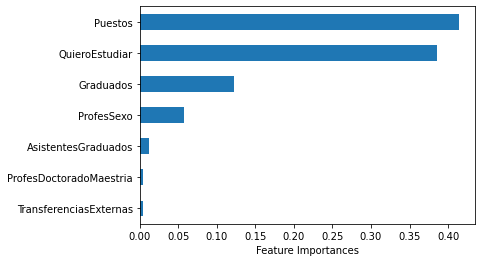

In [259]:
# Grafica las importancias en orden descendente
ii = np.argsort(GB.feature_importances_)

importances = GB.feature_importances_[ii]
predictors = predictors[ii]

a = pd.Series(importances, index=predictors)
a.plot(kind='barh')
plt.xlabel('Feature Importances')

In [260]:
def darPrediccion(objetivo):
    dataTrain1 = pd.read_excel('Datos_Limpios/datos2019_V'+str(V)+'.xlsx')
    dataTrain2 = pd.read_excel('Datos_Limpios/datos2020_V'+str(V)+'.xlsx')
    dataTrain1 = dataTrain1.fillna(0)
    dataTrain2 = dataTrain2.fillna(0)

    dataTrain1 = dataTrain1.loc[dataTrain1['Principal'] == objetivo]
    dataTrain2 = dataTrain2.loc[dataTrain2['Principal'] == objetivo]

    dataTrain = pd.concat([dataTrain1, dataTrain2])
    
    predictors = dataTrain.keys()
    predictors = predictors.drop(['Target', 'Principal', 'Secundario'])
    
    X_train = dataTrain[predictors]
    Y_train = dataTrain['Target']
    
    GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01)
    GB.fit(X_train, Y_train)
    
    dataTest = pd.read_excel('Datos_Limpios/datos2021_V'+str(V)+'.xlsx')
    dataTest = dataTest.fillna(0)
    dataTest = dataTest.loc[dataTest['Principal'] == objetivo]
    
    prediction = GB.predict(X_test)
    R2 = r2_score(Y_test, prediction)

    return [R2, prediction, Y_test]

In [261]:
data = pd.read_excel('Datos_Limpios/datos2019_V'+str(V)+'.xlsx')
data = data.fillna(0)
data = data.loc[data['Principal'] == 'Administración']
carreras = data['Secundario'].to_numpy()

# Tabla Comparativa de Error

Diferencia entre la predicción y valores de prueba según cada modelo por carrera y combinación particular de doble programa.

In [262]:
carreras = np.concatenate((['Administración'], carreras))

In [270]:
nCarreras = len(carreras)

R2 = np.zeros(nCarreras)
matrixPlot = np.zeros((nCarreras, nCarreras))

for i in range(nCarreras):
    [r2, Ypred, Y_test] = darPrediccion(carreras[i])
    R2[i] = r2
    for j in range(nCarreras):
        if(j < i):
            matrixPlot[i,j] = (Ypred[j] - float(Y_test[j]))*1e3
        elif(j>i):
            matrixPlot[i,j] = (Ypred[j-1] - float(Y_test[j-1]))*1e3

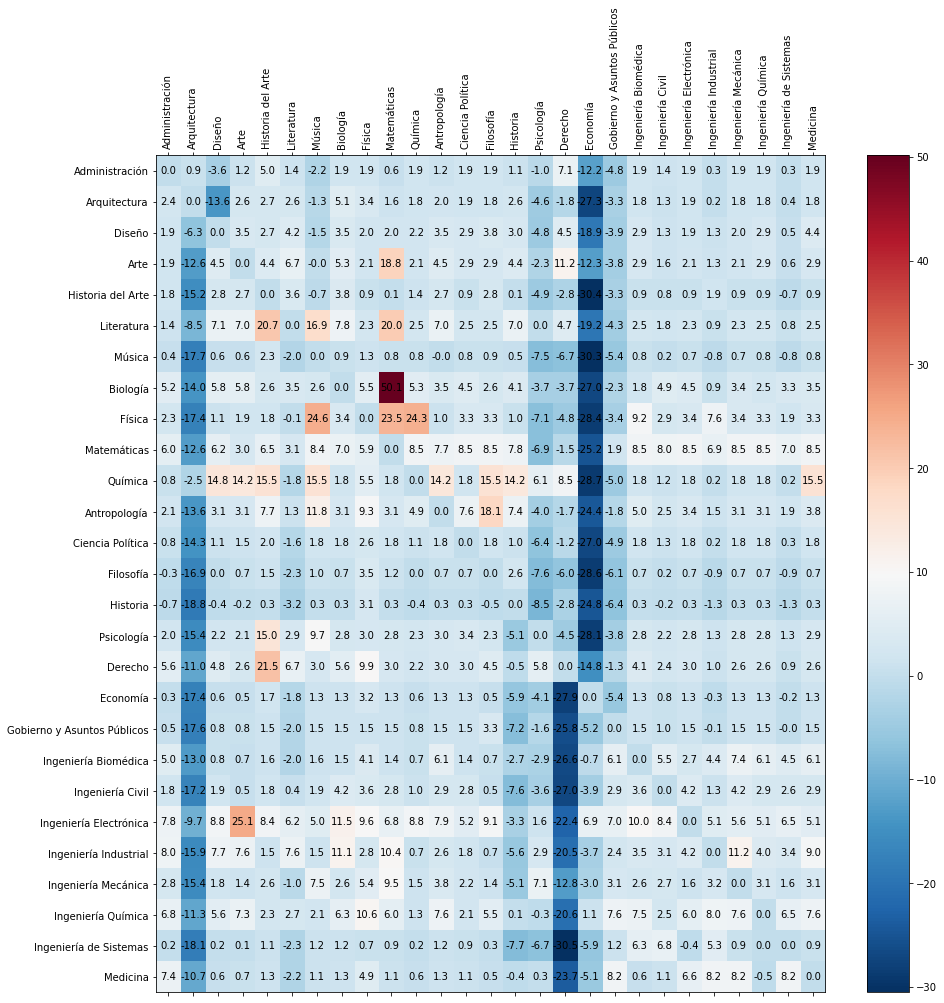

In [271]:
fig = plt.figure(figsize = (15,15))
plt.matshow(matrixPlot, cmap=plt.cm.RdBu_r, fignum = 1, aspect = 'auto')
plt.colorbar()
plt.xticks(range(nCarreras), carreras, rotation = 90, fontsize = 10);
plt.yticks(range(nCarreras), carreras, rotation = 0, fontsize = 10);

for i in range(nCarreras):
    for j in range(nCarreras):
        c = round(matrixPlot[j,i], 1)
        plt.text(i, j, str(c), va='center', ha='center', fontsize = 10)
        
plt.savefig('matrixPlot.svg')

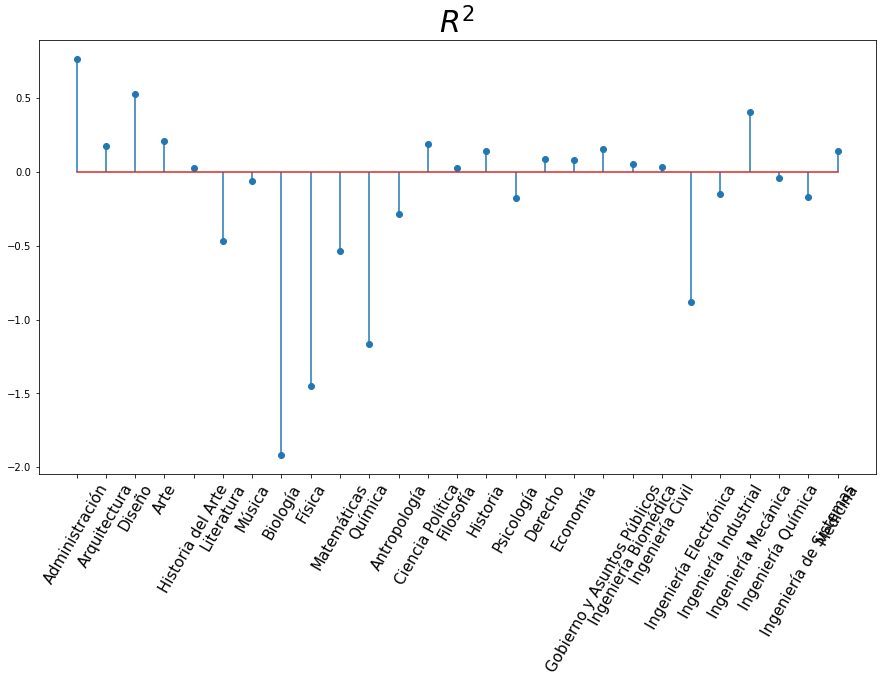

In [272]:
fig = plt.figure(figsize = (15,8))
plt.stem(range(nCarreras), R2)
plt.xticks(range(nCarreras), carreras, rotation = 60, fontsize = 15)
plt.title(r'$R^2$', fontsize = 30)
plt.savefig('r2plot.svg');

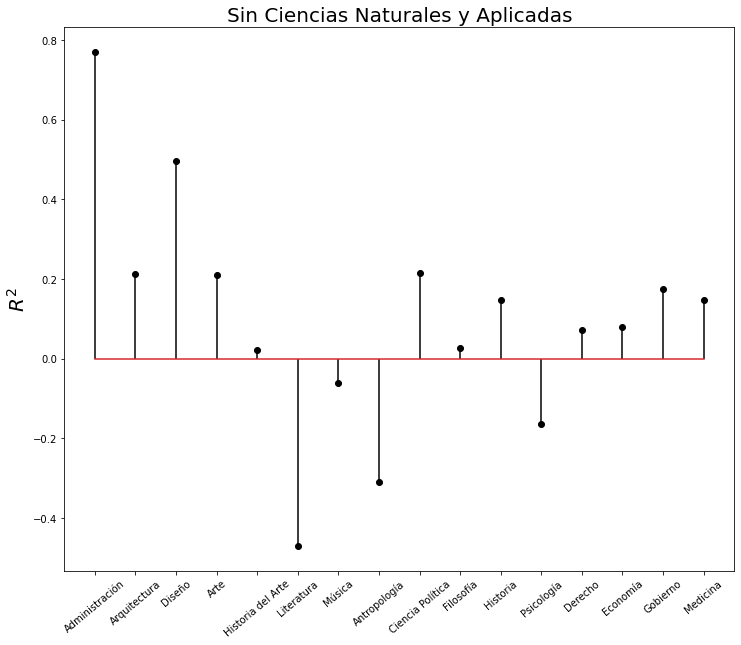

In [276]:
nCarreras = len(carreras)

R2 = []
ls = []
matrixPlot = np.zeros((nCarreras, nCarreras))

dataFacultad = pd.read_excel('Datos/facultadesProgramas.xlsx')
strFacultad = ['Ciencias', 'Ingeniería']

for i in range(nCarreras):
    [r2, Ypred, Y_test] = darPrediccion(carreras[i])
    
    if(dataFacultad.loc[dataFacultad['Programa'] == carreras[i]]['Facultad'].to_numpy()[0] not in strFacultad):
        R2.append(r2)
        if(carreras[i] == 'Gobierno y Asuntos Públicos'):
            ls.append('Gobierno')
        else:
            ls.append(carreras[i])
            
fig = plt.figure(figsize = (12,10))
plt.stem(ls, R2, 'k', markerfmt = 'ko')
plt.title('Sin Ciencias Naturales y Aplicadas', fontsize = 20)
plt.ylabel(r'$R^2$', fontsize = 20)
plt.xticks(rotation = 40)
plt.savefig('Otras.svg')

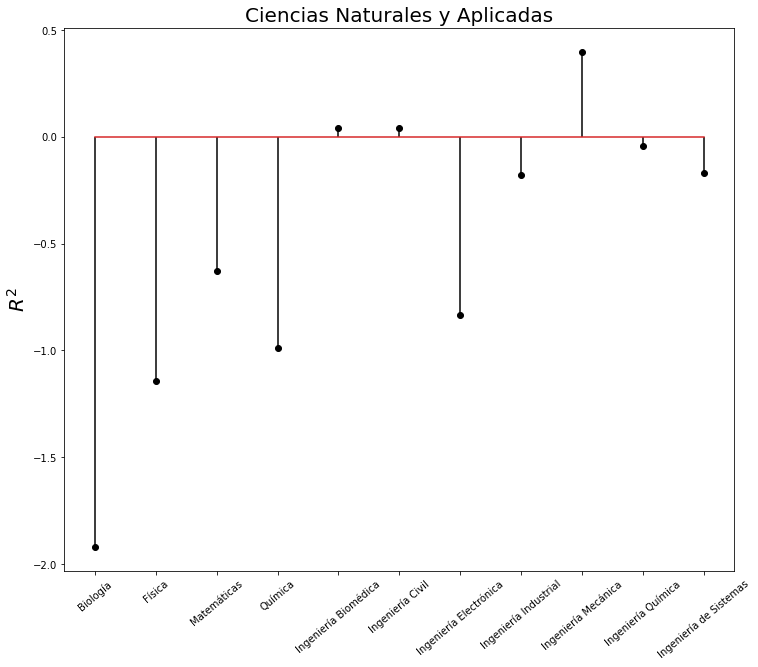

In [275]:
nCarreras = len(carreras)

R2 = []
ls = []
matrixPlot = np.zeros((nCarreras, nCarreras))

dataFacultad = pd.read_excel('Datos/facultadesProgramas.xlsx')
strFacultad = ['Ciencias', 'Ingeniería']

for i in range(nCarreras):
    [r2, Ypred, Y_test] = darPrediccion(carreras[i])
    
    if(dataFacultad.loc[dataFacultad['Programa'] == carreras[i]]['Facultad'].to_numpy()[0] in strFacultad):
        R2.append(r2)
        if(carreras[i] == 'Gobierno y Asuntos Públicos'):
            ls.append('Gobierno')
        else:
            ls.append(carreras[i])
            
fig = plt.figure(figsize = (12,10))
plt.stem(ls, R2, 'k', markerfmt = 'ko')
plt.title('Ciencias Naturales y Aplicadas', fontsize = 20)
plt.ylabel(r'$R^2$', fontsize = 20)
plt.xticks(rotation = 40)
plt.savefig('Otras.svg')

# Importance Plots


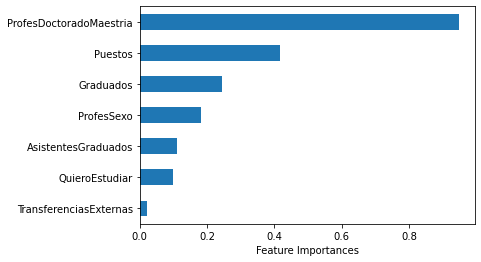

In [193]:
dataFacultad = pd.read_excel('Datos/facultadesProgramas.xlsx')
strFacultad = ['Ciencias']

imp = np.zeros((1,len(predictors)))

for i in range(nCarreras):
    importance = darPrediccion(carreras[i])
    
    if(dataFacultad.loc[dataFacultad['Programa'] == carreras[i]]['Facultad'].to_numpy()[0] in strFacultad):
        imp = np.vstack((imp, importance))
imp = np.delete(imp, 0, 0)